# 1D variably saturated flow

In [1]:
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

Find Tecplot point files in current directory

In [2]:
path = []
path.append('.')

files = pft.get_tec_filenames('HW5_1b',range(5)) # CHANGE this for new filename and range
filenames = pft.get_full_paths(path,files)

## Plot saturation profile over time

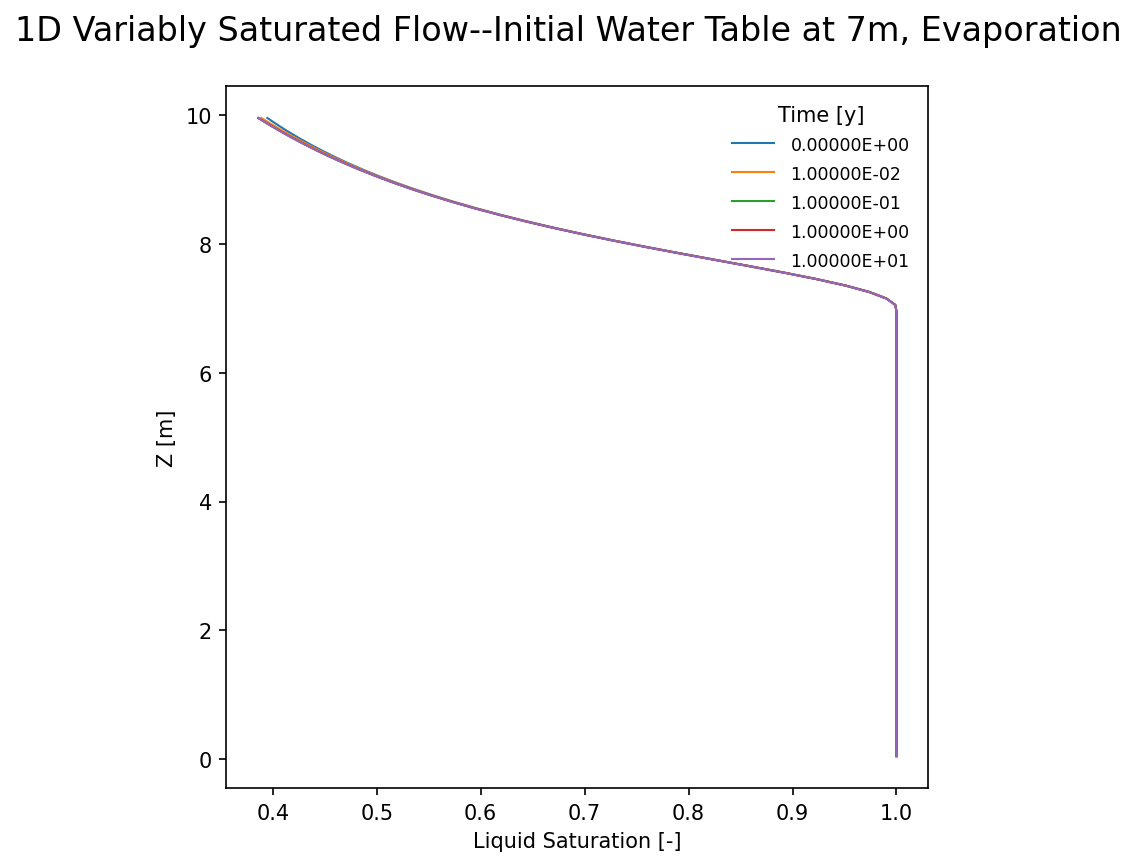

In [3]:
f = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("1D Variably Saturated Flow--Initial Water Table at 7m, Evaporation",fontsize=16)
plt.xlabel('Liquid Saturation [-]')
plt.ylabel('Z [m]')

# plt.xlim(0.,1.)

# set line styles
line_styles = []
for i in range(5):
    line_styles.append('-')
line_styles.append('--')

line_widths = []
for i in range(5):
    line_widths.append(1)
line_widths.append(2)

# read data and plot 
for ifile in range(len(filenames)):
    # select the variables for the plot
    # MODIFY this if your want to plot different variables
    x_var = 5 # the 5th variable in the .tec file (i.e., Liquid Saturation)
    y_var = 3 # the 3rd variable in the .tec file (i.e., Z [m])
    data = pft.Dataset(filenames[ifile],x_var,y_var) 
    plt.plot(data.get_array('x'),data.get_array('y'),label=data.title, \
           ls=line_styles[ifile],lw=line_widths[ifile])

# set legend
plt.legend(loc=1,title='Time [y]')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.12,right=.9)

plt.show()

## Plot observation

Note the observation point is located at the face of two grid cells. Therefore its cell value will be assigned by the upwind cell (i.e., lower cell center at `(0.5,0.5,4.95 m)`). The saturation plot below also confirms this as the max saturation is around 0.2, not 0.6 as shown in the above saturation profile.

To plot other variables, change the column index at line `column_index = 3` (e.g., 2 -- "Liquid Pressure", 3 -- "Liquid Saturation", etc.)

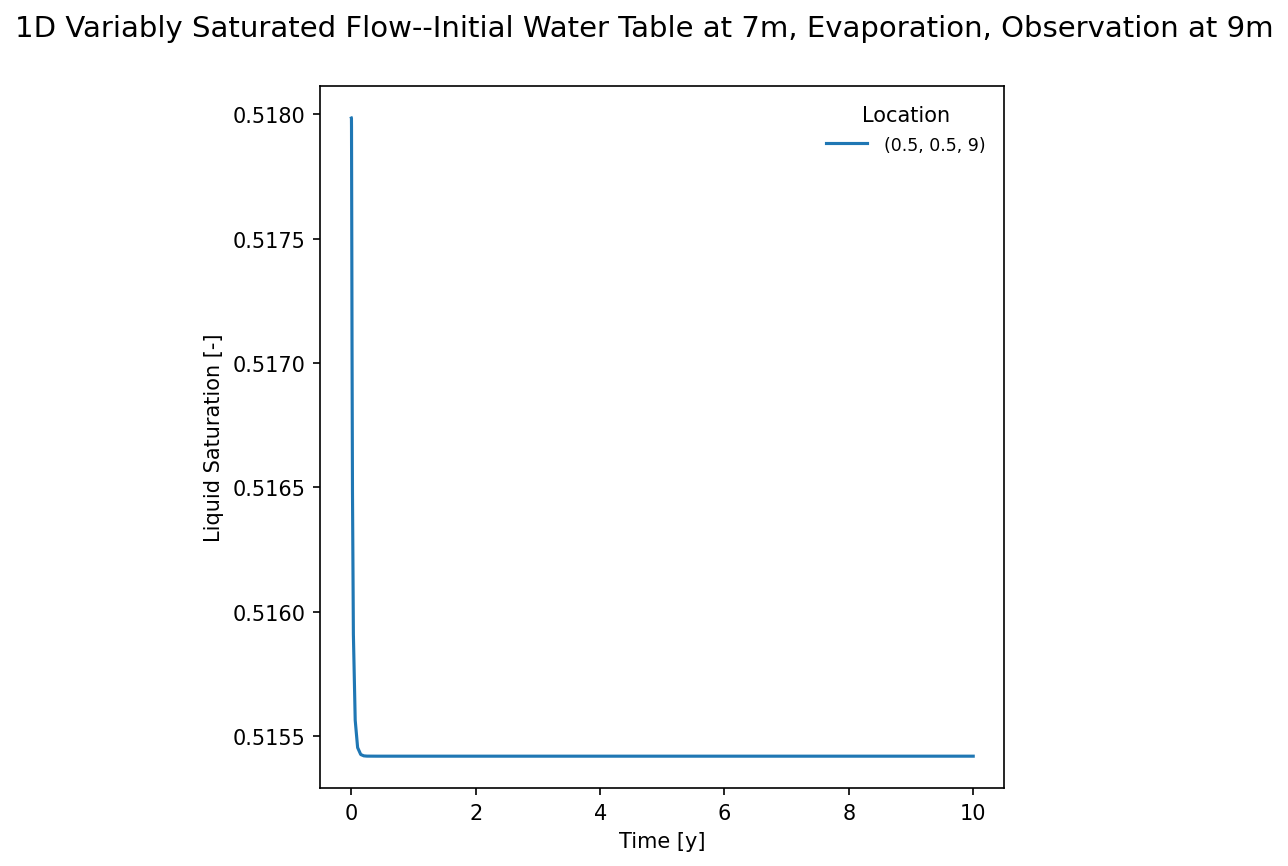

In [4]:
filenames = ['./HW5_1b-obs-0.pft'] #!MODIFY this if your observation file name is different.

f = plt.figure(figsize=(6,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("1D Variably Saturated Flow--Initial Water Table at 7m, Evaporation, Observation at 9m",fontsize=14)
plt.xlabel('Time [y]')
plt.ylabel('Liquid Saturation [-]')

# select the column index in the observation file
column_index = 3 #!MODIFY this if your variable is different
data = pft.Dataset(filenames[0],1,column_index)
plt.plot(data.get_array('x'),data.get_array('y'),label='(0.5, 0.5, 9)')

plt.legend(loc=1,title='Location')
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.14,right=.9)

plt.show()